In [2]:
import sklearn
import numpy as np
import os, sys

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd

In [3]:
folders = [
    'icferst_run_xgb_concat_delta/',
    'icferst_run_xgb_concat_delta_constraint/',
    'icferst_run_xgb_concat_delta_10update/', 
    'icferst_run_xgb_concat_delta_nothing1e-5/',
    'icferst_run_xgb_concat_delta_nothing1e-5_10update/',    
    'icferst_run_xgb_concat_delta_nothing1e-5_10update_constraint/',    
    'icferst_run_xgb_concat_delta_constraint_nothing1e-5/',
    'icferst_run_xgb_concat_delta_constraint_init_10update/',
]

In [5]:
list_df=[]
for folder in folders:
    list_df.append(pd.read_csv(folder+'results.csv'))
df_orig = pd.read_csv('../../datasets/icferst_run_orig/time_series.csv')

In [4]:
for i in range(len(list_df)):
    list_df[i] = list_df[i][['Time','avg(Time)','avg(Species_Ca+2)','avg(Species_Cl-)','avg(Species_K+)','avg(Species_NO3-)','avg(Species_Na+)']]
df_orig = df_orig[['Time','avg(Time)','avg(Species_Ca+2)','avg(Species_Cl-)','avg(Species_K+)','avg(Species_NO3-)','avg(Species_Na+)']]

In [5]:
df_orig

,Time,avg(Time),avg(Species_Ca+2),avg(Species_Cl-),avg(Species_K+),avg(Species_NO3-),avg(Species_Na+)
0,0,0,0.0000,0.000000e+00,2.000000e-04,0.001200,0.001000
1,1,720,0.0000,0.000000e+00,1.994000e-04,0.001196,0.000997
2,2,1440,0.0000,0.000000e+00,1.994000e-04,0.001196,0.000997
3,3,2160,0.0000,0.000000e+00,1.994000e-04,0.001196,0.000997
4,4,2880,0.0000,1.267540e-23,1.994000e-04,0.001196,0.000997
...,...,...,...,...,...,...,...
117,117,84240,0.0006,1.199990e-03,1.542880e-08,0.000000,0.000000
118,118,84960,0.0006,1.199990e-03,1.227440e-08,0.000000,0.000000
119,119,85680,0.0006,1.199990e-03,9.763230e-09,0.000000,0.000000
120,120,86400,0.0006,1.199990e-03,7.771020e-09,0.000000,0.000000


<AxesSubplot:>

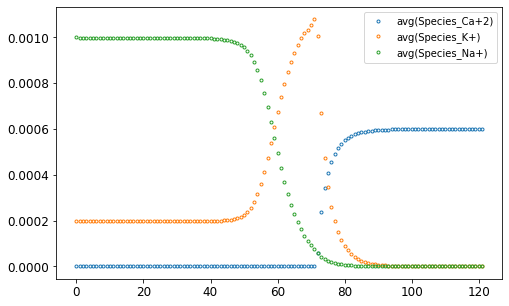

In [6]:
fig, ax = plt.subplots(1,1,figsize=(8,5))
df_orig[['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(linestyle='none', marker='.',markerfacecolor='none',ax=ax)

In [7]:
def crosscorr(datax, datay):
    """ Lag-N cross correlation. 
    Parameters
    ----------
    datax, datay : pandas.Series objects of equal length

    Returns
    ----------
    crosscorr : float
    """
    return [datax.corr(datay.shift(lag)) for lag in range(-int(len(datax)/2),int(len(datax)/2))]

In [8]:
x_range = range(-int(len(df_orig['avg(Species_K+)'])/2),int(len(df_orig['avg(Species_K+)'])/2))

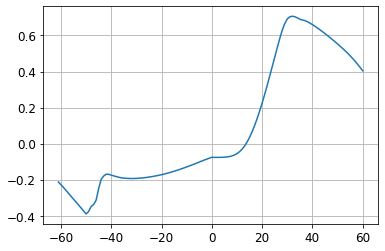

In [9]:
plt.plot(x_range, crosscorr(df_orig['avg(Species_K+)'], list_df[1]['avg(Species_K+)']))
plt.grid()

In [11]:
mse_err=[]
mae_err=[]
corr=[]
for i in range(len(list_df)):
    diff = list_df[i][['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']] - df_orig[['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']]
    mse_err.append((diff.to_numpy()**2).mean(axis=0))
    mae_err.append(abs(diff.to_numpy()).mean(axis=0))
    corr.append(np.array([
        max(crosscorr(df_orig['avg(Species_Ca+2)'], list_df[i]['avg(Species_Ca+2)'])),
        max(crosscorr(df_orig['avg(Species_K+)'], list_df[i]['avg(Species_K+)'])),
        max(crosscorr(df_orig['avg(Species_Na+)'], list_df[i]['avg(Species_Na+)'])),
        ]))
mse_err=np.array(mse_err)
mae_err=np.array(mae_err)
corr=np.array(corr)
for i in range(len(list_df)):
    print(f'{mse_err[i]*1e6}', f'{np.mean(mse_err[i]*1e6):.3f}',folders[i])
print()
for i in range(len(list_df)):
    print(f'{mae_err[i]*1e3}', f'{np.mean(mae_err[i]*1e3):.3f}', folders[i])
print()
for i in range(len(list_df)):
    print(f'{corr[i]}', f'{np.mean(corr[i]):.3f}',folders[i])        

[0.09686251 0.19495767 0.08647958] 0.126 icferst_run_xgb_concat_delta/
[0.0313167  0.11399745 0.02659135] 0.057 icferst_run_xgb_concat_delta_constraint/
[0.04061251 0.75387275 0.01315586] 0.269 icferst_run_xgb_concat_delta_10update/
[0.08563526 0.11382676 0.10492153] 0.101 icferst_run_xgb_concat_delta_nothing1e-5/
[0.00217071 0.13685545 0.01248271] 0.051 icferst_run_xgb_concat_delta_nothing1e-5_10update/
[0.00155154 0.00684203 0.00048586] 0.003 icferst_run_xgb_concat_delta_nothing1e-5_10update_constraint/
[0.08456298 0.11435873 0.10556022] 0.101 icferst_run_xgb_concat_delta_constraint_nothing1e-5/
[0.01644822 0.06413271 0.00110757] 0.027 icferst_run_xgb_concat_delta_constraint_init_10update/

[0.1932113  0.33026775 0.15289516] 0.225 icferst_run_xgb_concat_delta/
[0.10381352 0.17006481 0.09452887] 0.123 icferst_run_xgb_concat_delta_constraint/
[0.10312801 0.54799703 0.05262949] 0.235 icferst_run_xgb_concat_delta_10update/
[0.17528174 0.16388404 0.17278096] 0.171 icferst_run_xgb_concat_d

Lower is better:


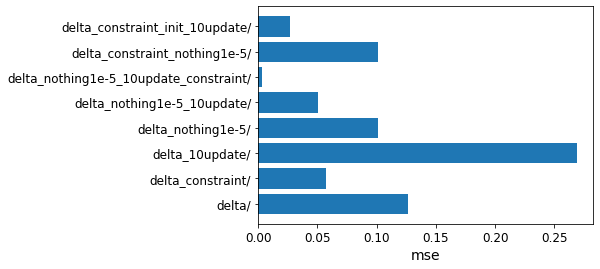

In [13]:
fig, ax = plt.subplots()
ax.barh(range(len(mse_err)),mse_err.mean(axis=1)*1e6)
ax.set_yticks(range(len(mse_err)), labels=[f[23:] for f in folders]);
ax.set_xlabel('mse');
print('Lower is better:')

Lower is better:


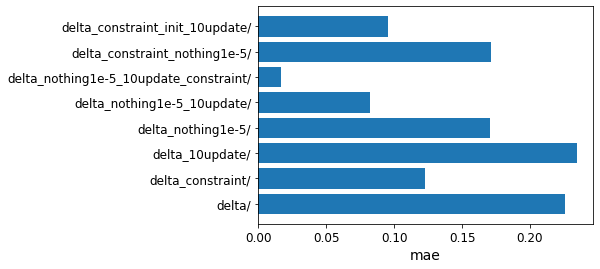

In [14]:
fig, ax = plt.subplots()
ax.barh(range(len(mae_err)),mae_err.mean(axis=1)*1e3)
ax.set_yticks(range(len(mae_err)), labels=[f[23:] for f in folders]);
ax.set_xlabel('mae');
print('Lower is better:')

Higher is better:


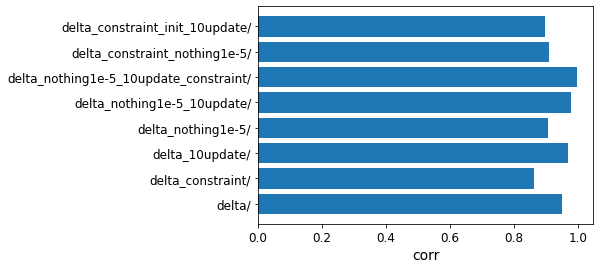

In [15]:
fig, ax = plt.subplots()
ax.barh(range(len(corr)),corr.mean(axis=1))
ax.set_yticks(range(len(corr)), labels=[f[23:] for f in folders]);
ax.set_xlabel('corr');
print('Higher is better:')

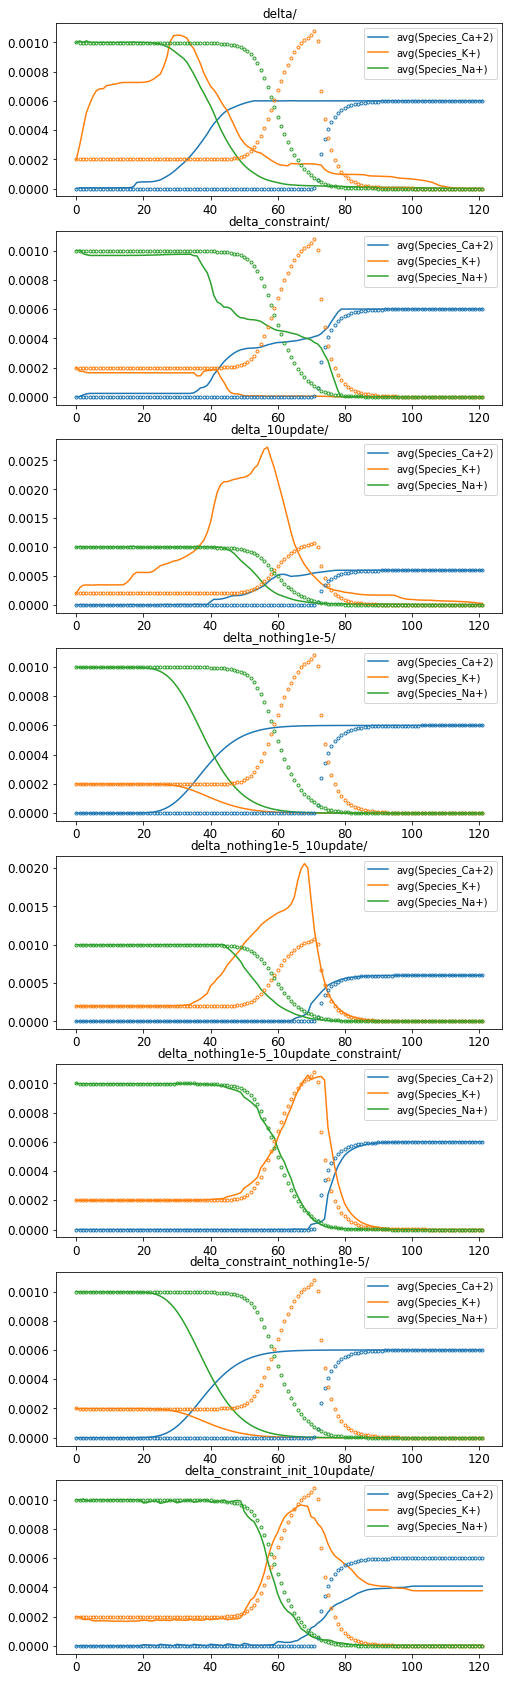

In [16]:
fig, axs = plt.subplots(len(list_df),1,figsize=(8,30))
for i in range(len(list_df)):
    list_df[i][['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(ax=axs[i],title=[f[23:] for f in folders][i])
    axs[i].set_prop_cycle(None)
    df_orig[['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(linestyle='none', marker='.',markerfacecolor='none',ax=axs[i],title=[f[23:] for f in folders][i],legend=None)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


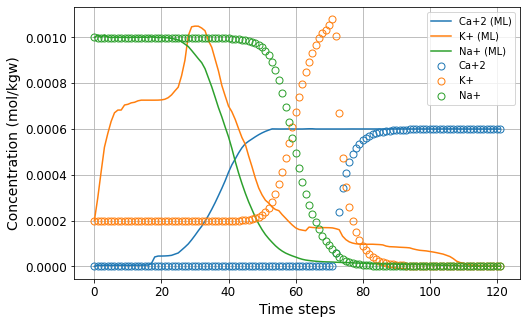

In [17]:
fig, axs = plt.subplots(1,1,figsize=(8,5),)
for i in range(0,1):
    list_df[i][['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(ax=axs)
    axs.set_prop_cycle(None)
    df_orig[['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(linestyle='none', label=['Ca+2','K+','Na+'],marker='.',markerfacecolor='none',markersize=14,ax=axs,legend=None)
    plt.grid()
axs.legend(['Ca+2 (ML)','K+ (ML)','Na+ (ML)','Ca+2','K+','Na+'])   
axs.set_xlabel('Time steps')
axs.set_ylabel('Concentration (mol/kgw)')
#plt.savefig('sim_zeros200.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


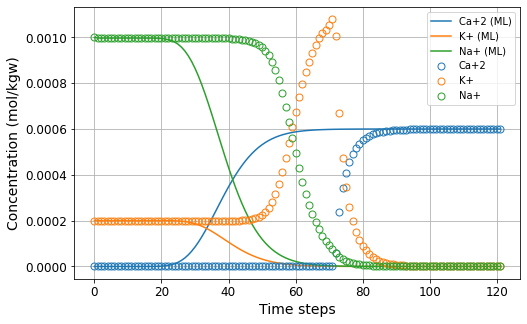

In [18]:
fig, axs = plt.subplots(1,1,figsize=(8,5),)
for i in range(3,4):
    list_df[i][['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(ax=axs)
    axs.set_prop_cycle(None)
    df_orig[['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(linestyle='none', label=['Ca+2','K+','Na+'],marker='.',markerfacecolor='none',markersize=14,ax=axs,legend=None)
    plt.grid()
axs.legend(['Ca+2 (ML)','K+ (ML)','Na+ (ML)','Ca+2','K+','Na+'])   
axs.set_xlabel('Time steps')
axs.set_ylabel('Concentration (mol/kgw)')
#plt.savefig('sim_noth.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


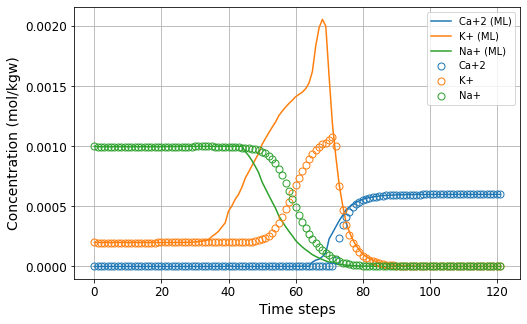

In [19]:
fig, axs = plt.subplots(1,1,figsize=(8,5),)
for i in range(4,5):
    list_df[i][['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(ax=axs)
    axs.set_prop_cycle(None)
    df_orig[['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(linestyle='none', label=['Ca+2','K+','Na+'],marker='.',markerfacecolor='none',markersize=14,ax=axs,legend=None)
    plt.grid()
axs.legend(['Ca+2 (ML)','K+ (ML)','Na+ (ML)','Ca+2','K+','Na+'])   
axs.set_xlabel('Time steps')
axs.set_ylabel('Concentration (mol/kgw)')
#plt.savefig('sim_noth_10up.eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


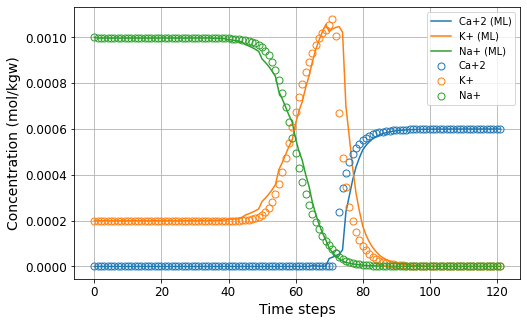

In [20]:
fig, axs = plt.subplots(1,1,figsize=(8,5),)
for i in range(5,6):
    list_df[i][['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(ax=axs)
    axs.set_prop_cycle(None)
    df_orig[['avg(Species_Ca+2)','avg(Species_K+)','avg(Species_Na+)']].plot(linestyle='none', label=['Ca+2','K+','Na+'],marker='.',markerfacecolor='none',markersize=14,ax=axs,legend=None)
    plt.grid()
axs.legend(['Ca+2 (ML)','K+ (ML)','Na+ (ML)','Ca+2','K+','Na+'])   
axs.set_xlabel('Time steps')
axs.set_ylabel('Concentration (mol/kgw)')
#plt.savefig('sim_noth_10up_cons.eps')